In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
data=pd.read_csv("kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class']
data.columns              

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [6]:
data.isnull().any()

id                         False
age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [7]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)

In [8]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

In [9]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'red_blood_cells', 'white_blood_cell_count', 'hypertension', 'class', 'pus_cell_clumps', 'appetite', 'diabetesmellitus', 'pus_cell', 'bacteria', 'coronary_artery_disease', 'anemia', 'pedal_edema'}


In [10]:
for i in catcols:
  print("Columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')

Columns: red_blood_cells
Counter({'normal': 353, 'abnormal': 47})
************************************************************************************************************************

Columns: white_blood_cell_count
Counter({nan: 105, '9800': 11, '6700': 10, '9600': 9, '9200': 9, '7200': 9, '6900': 8, '11000': 8, '5800': 8, '7800': 7, '9100': 7, '9400': 7, '7000': 7, '4300': 6, '6300': 6, '10700': 6, '10500': 6, '7500': 5, '8300': 5, '7900': 5, '8600': 5, '5600': 5, '10200': 5, '5000': 5, '8100': 5, '9500': 5, '6000': 4, '6200': 4, '10300': 4, '7700': 4, '5500': 4, '10400': 4, '6800': 4, '6500': 4, '4700': 4, '7300': 3, '4500': 3, '8400': 3, '6400': 3, '4200': 3, '7400': 3, '8000': 3, '5400': 3, '3800': 2, '11400': 2, '5300': 2, '8500': 2, '14600': 2, '7100': 2, '13200': 2, '9000': 2, '8200': 2, '15200': 2, '12400': 2, '12800': 2, '8800': 2, '5700': 2, '9300': 2, '6600': 2, '12100': 1, '12200': 1, '18900': 1, '21600': 1, '11300': 1, '\t6200': 1, '11800': 1, '12500': 1, '11900': 1, 

In [11]:
#catcols.remove('red_blood_cell_count')
#catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'red_blood_cells', 'hypertension', 'class', 'pus_cell_clumps', 'appetite', 'diabetesmellitus', 'pus_cell', 'bacteria', 'coronary_artery_disease', 'anemia', 'pedal_edema'}


In [12]:
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus',
         'hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

In [13]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("LABEL ENCODING OF :",i)
  LEi = LabelEncoder()
  print(c(data[i]))
  data[i] = LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

LABEL ENCODING OF : anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF : pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF : appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF : bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF : class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
LABEL ENCODING OF : coronary

In [14]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'potassium', 'age', 'sodium', 'hypertension', 'albumin', 'anemia', 'packed_cell_volume', 'specific_gravity', 'red_blood_cell_count', 'blood_pressure', 'id', 'class', 'sugar', 'pus_cell_clumps', 'appetite', 'bacteria', 'hemoglobin', 'blood glucose random', 'pedal_edema', 'red_blood_cells', 'blood_urea', 'diabetesmellitus', 'pus_cell', 'coronary_artery_disease', 'serum_creatinine'}


In [15]:
for i in contcols:
  print ("Contions Columns :",i)
  print(c(data[i]))
  print("*"*120+'\n')

Contions Columns : potassium
Counter({4.62724358974359: 88, 5.0: 30, 3.5: 30, 4.9: 27, 4.7: 17, 4.8: 16, 4.0: 14, 4.2: 14, 4.1: 14, 3.8: 14, 3.9: 14, 4.4: 14, 4.5: 13, 3.7: 12, 4.3: 12, 3.6: 8, 4.6: 7, 3.4: 5, 5.2: 5, 5.7: 4, 5.3: 4, 3.2: 3, 5.5: 3, 2.9: 3, 5.4: 3, 6.3: 3, 3.3: 3, 2.5: 2, 5.8: 2, 5.9: 2, 5.6: 2, 3.0: 2, 6.5: 2, 6.4: 1, 6.6: 1, 39.0: 1, 7.6: 1, 47.0: 1, 5.1: 1, 2.8: 1, 2.7: 1})
************************************************************************************************************************

Contions Columns : age
Counter({60.0: 28, 65.0: 17, 48.0: 12, 50.0: 12, 55.0: 12, 47.0: 11, 62.0: 10, 45.0: 10, 54.0: 10, 59.0: 10, 56.0: 10, 61.0: 9, 70.0: 9, 46.0: 9, 34.0: 9, 68.0: 8, 73.0: 8, 64.0: 8, 71.0: 8, 57.0: 8, 63.0: 7, 72.0: 7, 67.0: 7, 30.0: 7, 42.0: 6, 69.0: 6, 35.0: 6, 44.0: 6, 43.0: 6, 33.0: 6, 51.0: 5, 52.0: 5, 53.0: 5, 75.0: 5, 76.0: 5, 58.0: 5, 41.0: 5, 66.0: 5, 24.0: 4, 40.0: 4, 39.0: 4, 80.0: 4, 23.0: 4, 74.0: 3, 38.0: 3, 17.0: 3, 8.0: 3, 32.0: 3, 37.0: 3

In [16]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'potassium', 'age', 'sodium', 'hypertension', 'anemia', 'packed_cell_volume', 'red_blood_cell_count', 'blood_pressure', 'id', 'class', 'pus_cell_clumps', 'appetite', 'bacteria', 'hemoglobin', 'blood glucose random', 'pedal_edema', 'red_blood_cells', 'blood_urea', 'diabetesmellitus', 'pus_cell', 'coronary_artery_disease', 'serum_creatinine'}


In [17]:
#catcols.add('specific_gravity')
#catcols.add('albumin')
#catcols.add('sugar')
print(catcols)

['anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetesmellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells']


In [18]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({1: 364, 2: 34, 0: 2})

In [19]:
data['diabtesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':'no'})
c(data['diabetesmellitus'])

Counter({4: 134, 3: 260, 2: 1, 0: 3, 1: 2})

In [20]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class,diabtesmellitus
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,...,38.884498,4.707435,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000,3.300000
std,115.614301,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,...,8.151081,0.840314,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152,0.579517
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,34.000000,4.500000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,38.884498,4.707435,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,44.000000,5.100000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000,4.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.000000,8.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000


<ipython-input-21-868c85374ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

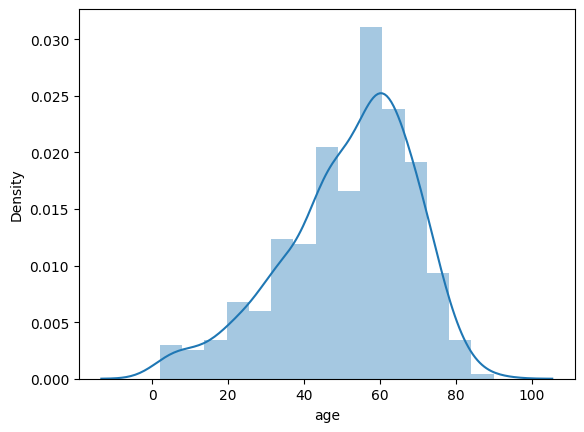

In [21]:
sns.distplot(data.age)

Text(0.5, 1.0, 'age VS blood Scatter Plot')

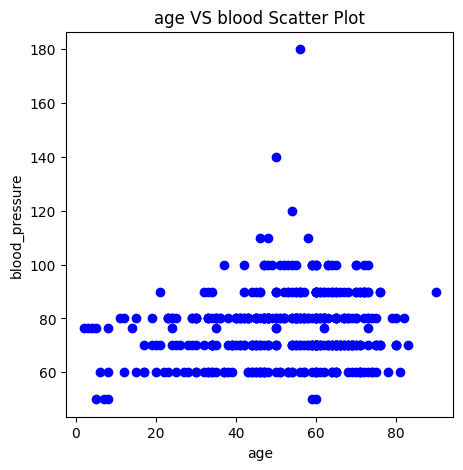

In [22]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood_pressure')
plt.title("age VS blood Scatter Plot")

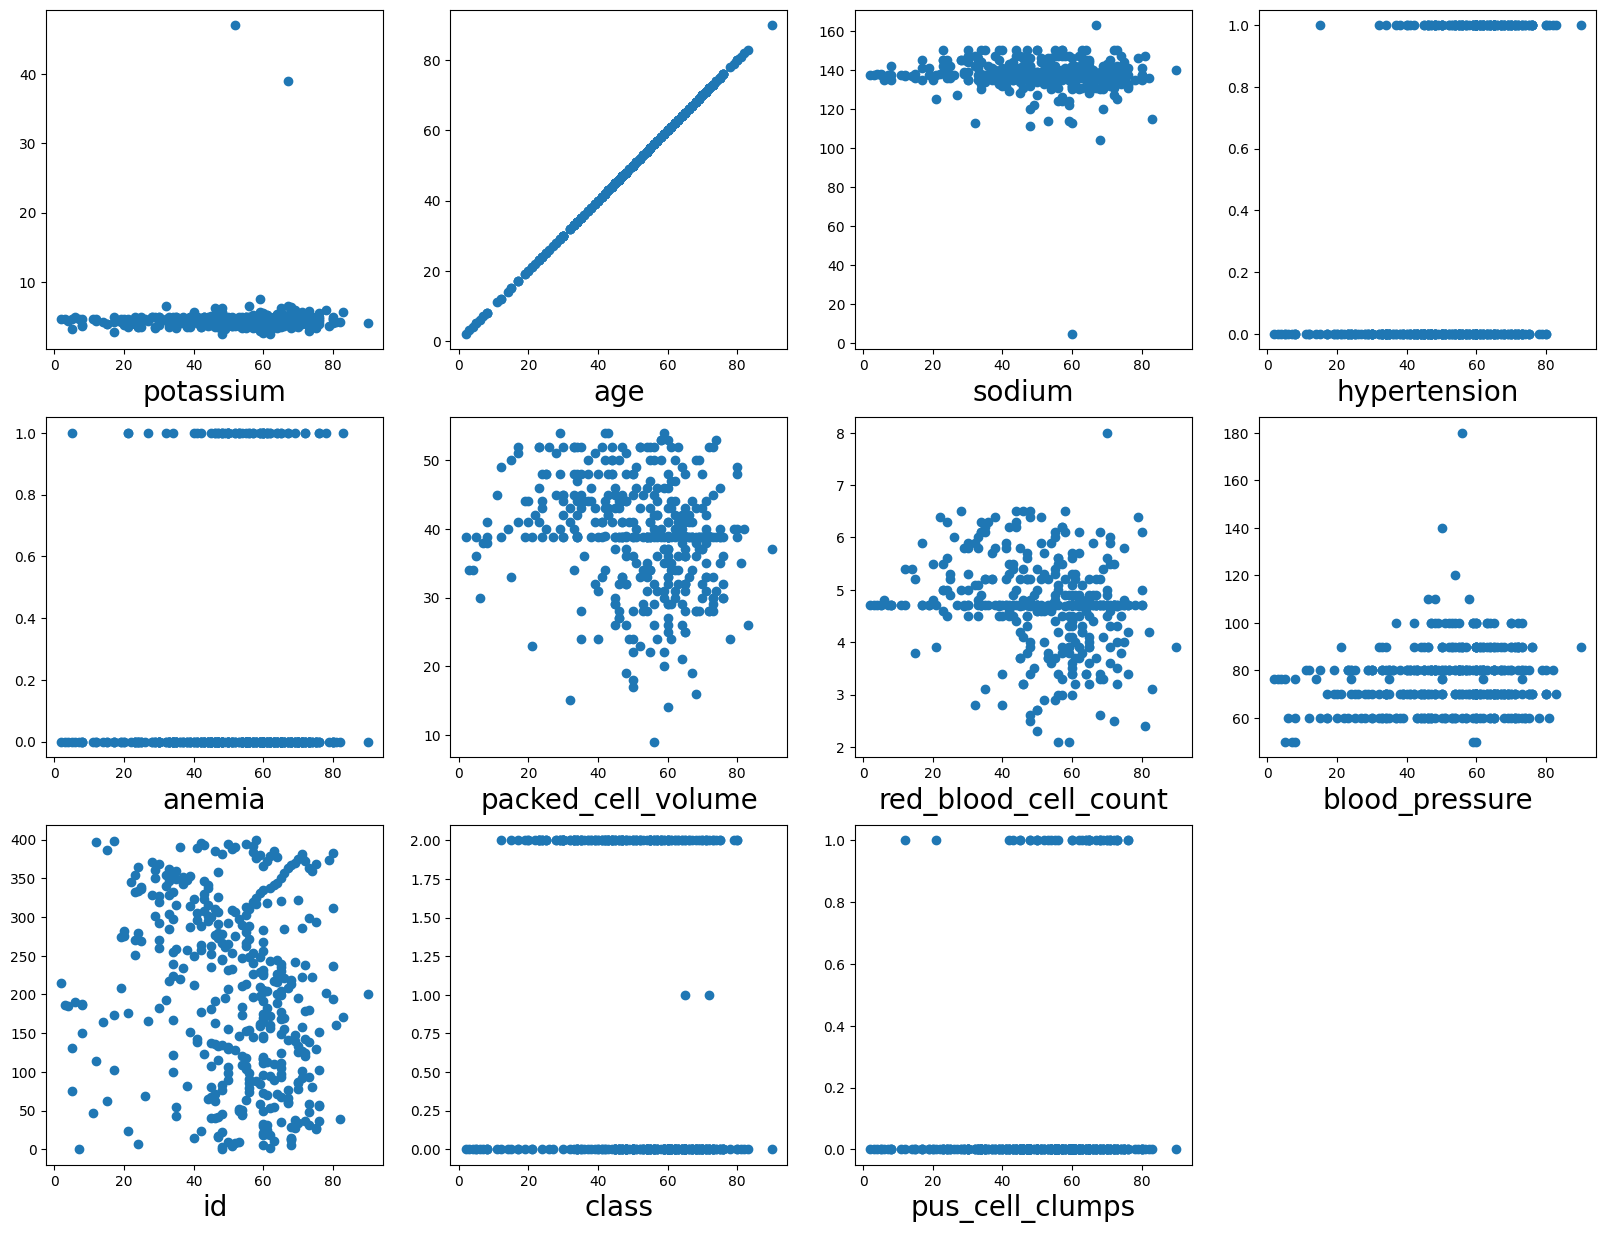

In [23]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber = 1

for column in contcols:
  if plotnumber<=11 :
    ax = plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.show()   

<ipython-input-24-d8577e1da913>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidth=0.5,linecolor="orange")


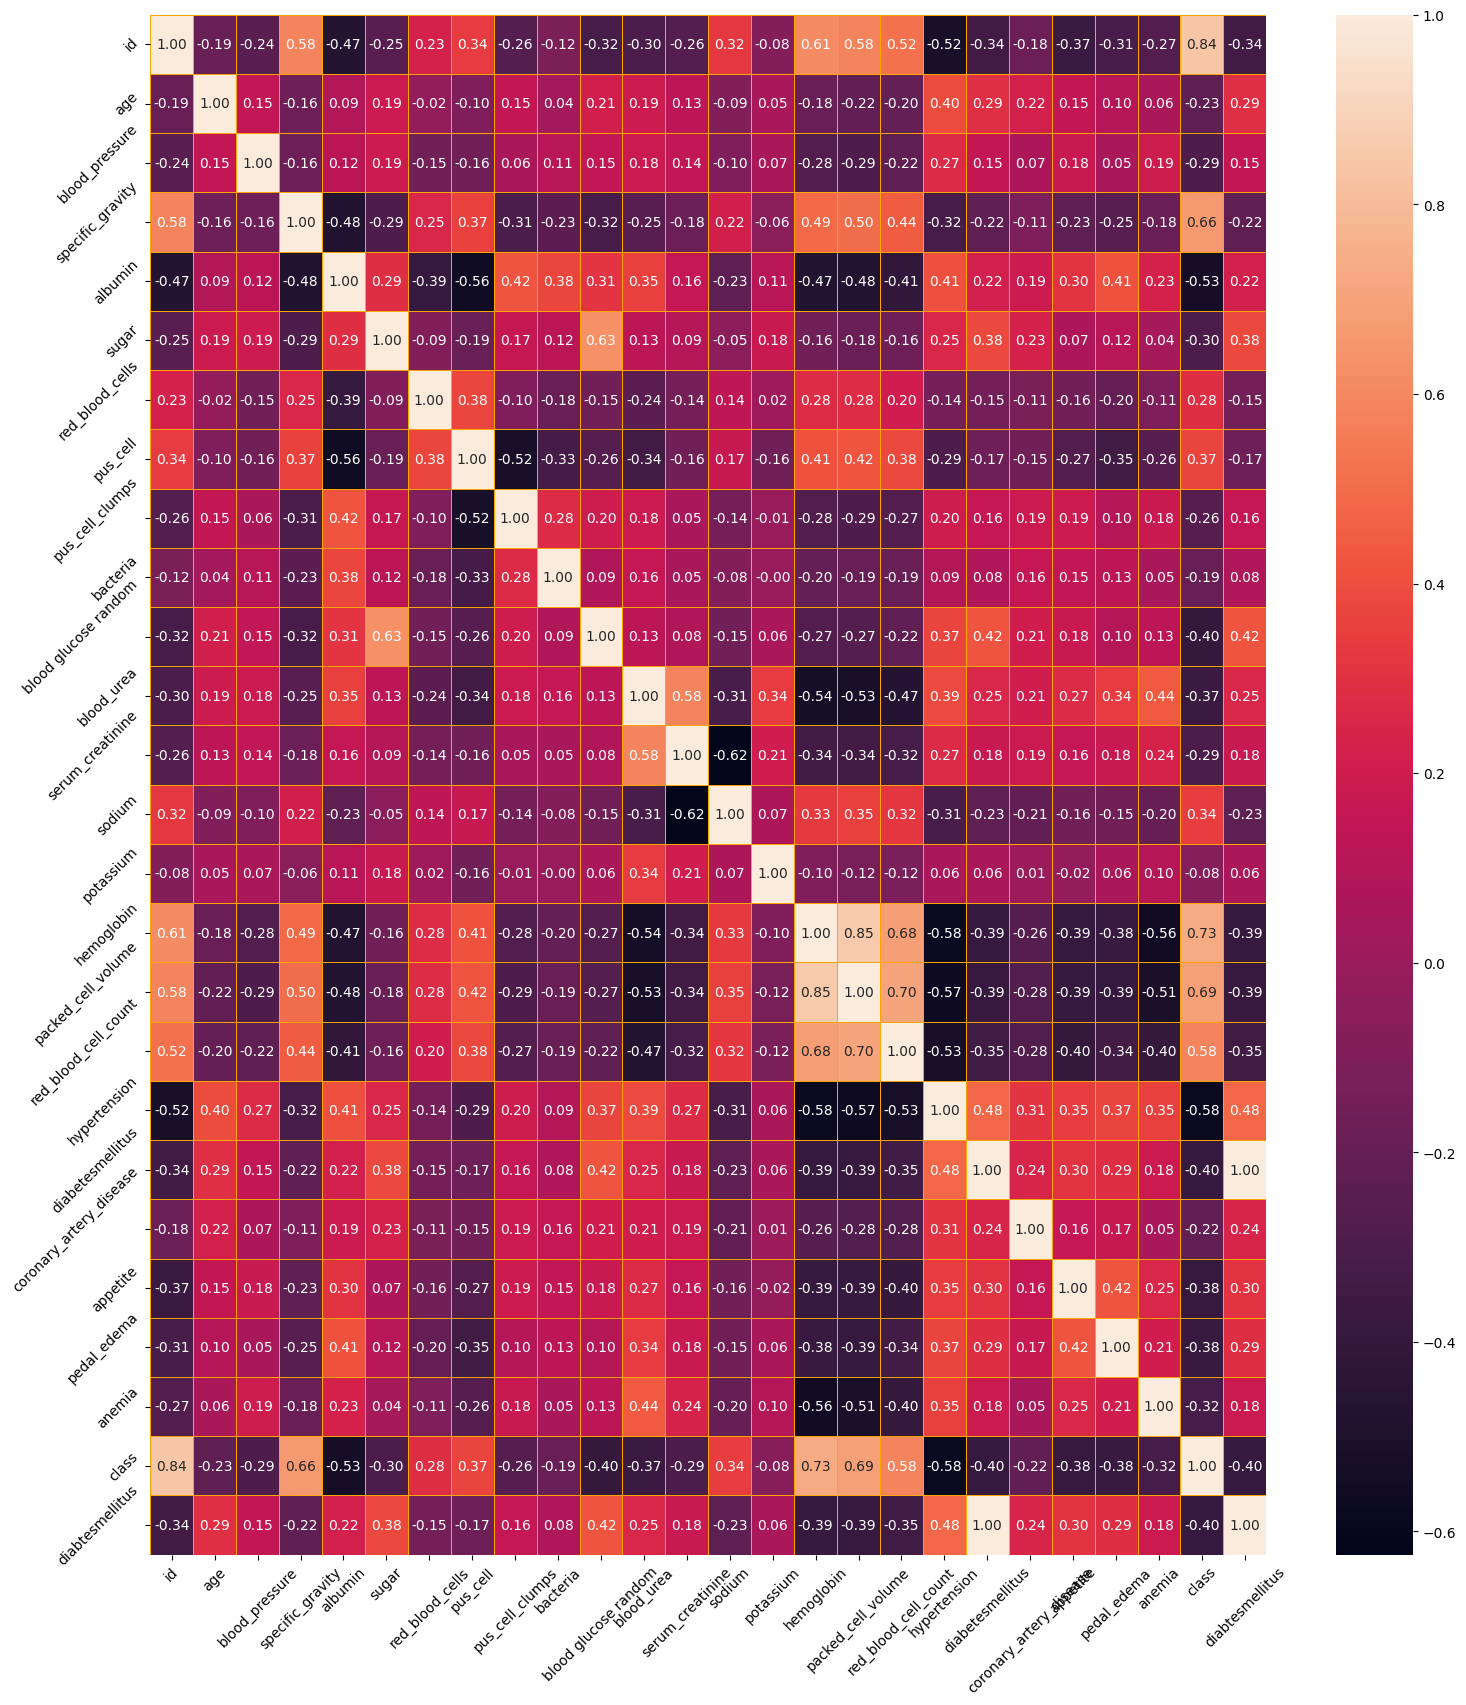

In [24]:
f,ax=plt.subplots(figsize=(18,20))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidth=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

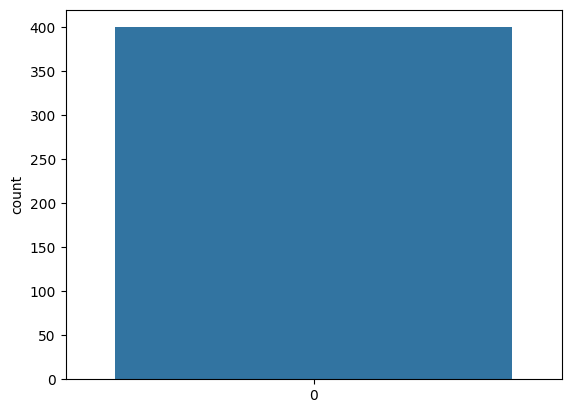

In [25]:
sns.countplot(data['class'])

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#x_bal=sc.fit_transform(x)

In [27]:
from numpy.ma.core import shape
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea',
         'pedal_edama','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)         

(400, 8)
(400, 1)


In [28]:
from sklearn.model_selection import train_test_split
x_train,xtest,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [31]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
26/26 [==============================] - 2s 12ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 8/100
26/26 [==============================] - 0

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Create a sample dataset
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 1, 1, 0])
x_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_test = np.array([0, 1, 1, 0])

# Create a RandomForestClassifier object
rfc = RandomForestClassifier(n_estimators=100)

# Train the model using the training data
rfc.fit(x_train, y_train)

# Test the model using the testing data
y_pred = rfc.predict(x_test)

# Calculate the accuracy of the model on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [35]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_predict = rfc.predict(x_test)

In [37]:
y_predict_train = rfc.predict(x_train)

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [39]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
y_predict= dtc.predict(x_test) 
y_predict

array([0, 1, 1, 0])

In [41]:
from sklearn.linear_model import LogisticRegression 
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [42]:
from sklearn.metrics import accuracy_score, classification_report
y_predict = lgr.predict(x_test)

In [43]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create a sample dataset
X = np.array([[0, 0, 121.000000, 36.0, 0, 0, 1, 0], [1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
y = np.array([0, 1])

# Create a LogisticRegression object
lgr = LogisticRegression()

# Train the model using the dataset
lgr.fit(X, y)

# Predict the outcome for a new set of input features
X_new = np.array([[1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
y_pred = lgr.predict(X_new)

print(y_pred)


[1]


In [44]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Create a sample dataset
X = np.array([[0, 0, 121.000000, 36.0, 0, 0, 1, 0], [1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
y = np.array([0, 1])

# Create a DecisionTreeClassifier object
dtc = DecisionTreeClassifier()

# Train the model using the dataset
dtc.fit(X, y)

# Predict the outcome for a new set of input features
X_new = np.array([[1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
y_pred = dtc.predict(X_new)

print(y_pred)


[1]


In [45]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a sample dataset
X = np.array([[0, 0, 121.000000, 36.0, 0, 0, 1, 0], [1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
y = np.array([0, 1])

# Create a RandomForestClassifier object
rfc = RandomForestClassifier()

# Train the model using the dataset
rfc.fit(X, y)

# Predict the outcome for a new set of input features
X_new = np.array([[1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
y_pred = rfc.predict(X_new)

print(y_pred)


[1]


In [56]:
#classification.save("ckd.h5")

In [47]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a sample dataset
X_train = np.array([[0, 0, 121.000000, 36.0, 0, 0, 1, 0], [1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
y_train = np.array([0, 1])
X_test = np.array([[1, 1, 121.000000, 36.0, 0, 0, 1, 0]])

# Create a machine learning classifier object
# Example 1: Logistic Regression
classification = LogisticRegression()

# Example 2: Decision Tree
# classification = DecisionTreeClassifier()

# Example 3: Random Forest
# classification = RandomForestClassifier()

# Train the model using the training dataset
classification.fit(X_train, y_train)

# Predict the outcome for the test dataset
y_pred = classification.predict(X_test)

print(y_pred)


[1]


In [48]:
y_pred

array([1])

In [49]:
y_pred = (y_pred > 0.5)
y_pred

array([ True])

In [50]:
def predict_exit(sample_value):
  sample_value = np.array(sample_value)
  sample_value = sample_value.reshape(1, -1)
  sample_value = sc.transform(sample_value)
  return classifier.predict(sample_value)

In [51]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
    print('Prediction: High chance of CKD!')
else:
    print('Prediction: Low chance of CKD!')

Prediction: High chance of CKD!


In [57]:
df = []
models = [
          ('LogReg', LogisticRegression()),
          ('RF', RandomForestClassifier()), 
          ('DecisionTree', DecisionTreeClassifier()),


          ]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['NO CKD', 'CKD']
for name, model in models:
  kfold = model_selection.KFold(n_splits = 5, shuffle = True, random_state = 90210)
  cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
  clf = model.fit(x_train, y_train) 
  y_pred = clf.predict(x_test)
  print(name)
  print(classification_report(y_test, y_pred, target_names=target_names))
  results.append(cv_results)
  names.append(name)
  this_df = pd.DataFrame(cv_results)
  this_df['model'] = name
  dfs.append(this_df)
final=pd.concat(dfs, ignore_index=True)
return final

NameError: ignored

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[2, 0],
       [2, 0]])

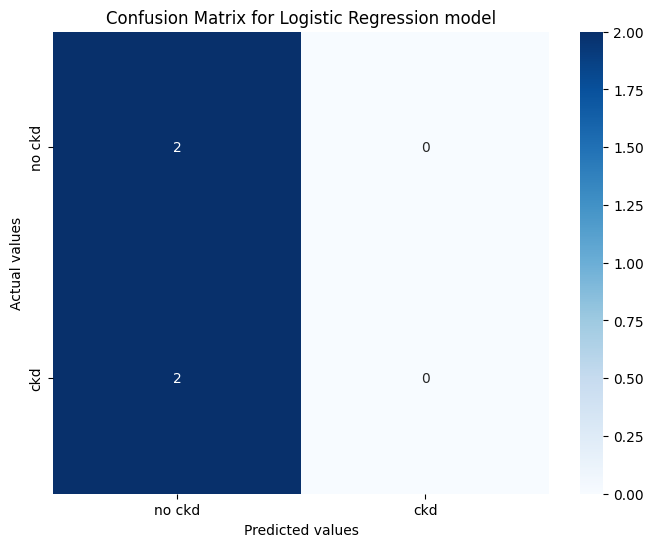

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

In [63]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
cm

array([[2, 0],
       [2, 0]])

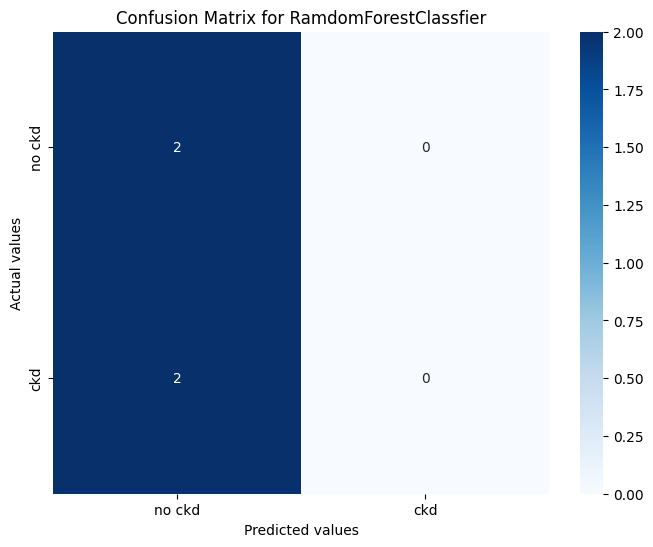

In [69]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues',annot=True,xticklabels=['no ckd','ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for RamdomForestClassfier')
plt.show()

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[2, 0],
       [2, 0]])

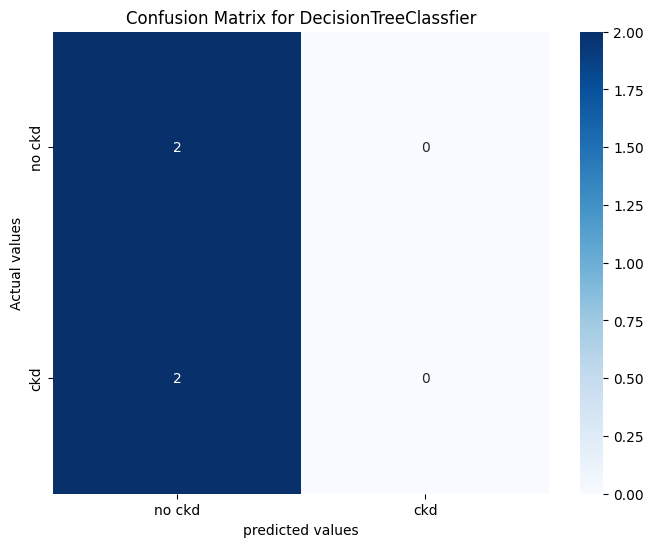

In [73]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues',annot=True,xticklabels=['no ckd','ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for DecisionTreeClassfier')
plt.show()

In [74]:
# Making the Confusion Matrix
from sklearn. metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[2, 0],
       [2, 0]])

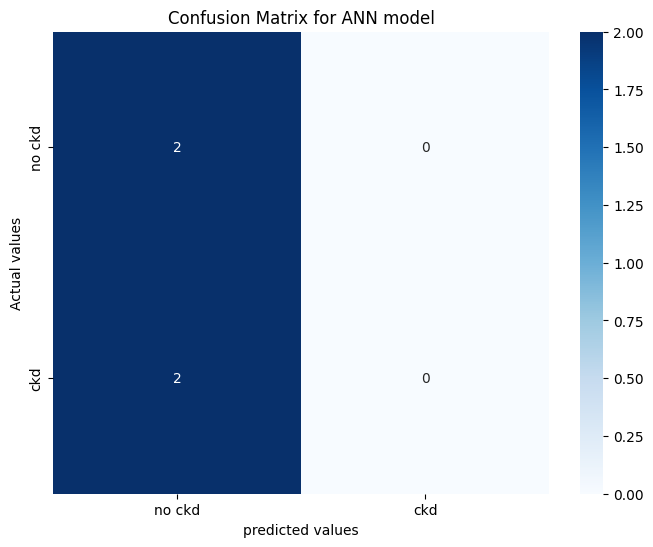

In [75]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues',annot=True,xticklabels=['no ckd','ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()